# Goal: Predict total COVID cases

In [1187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1188]:
data = pd.read_csv('worldmeter_data.csv')

In [1189]:
data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [1190]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [1191]:
data.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


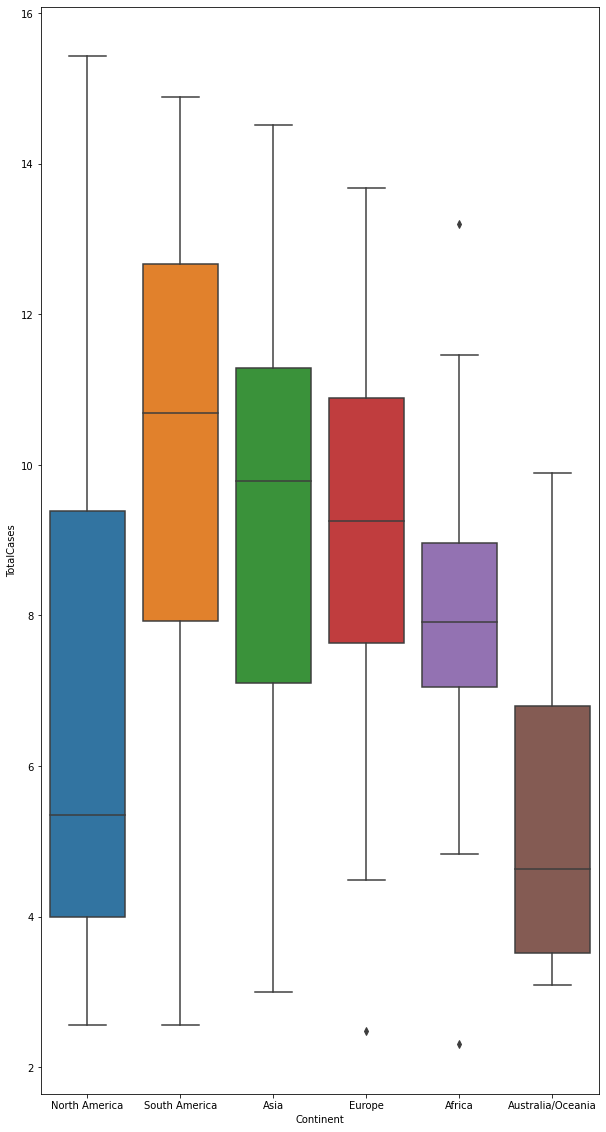

In [1192]:
plt.figure(figsize=(10,20))  
a= np.log(data['TotalCases'])
b = data['Continent']
sns.boxplot(x= b, y= a, data = data) 

In [1193]:
data.groupby('Continent')['TotalCases'].mean()

Continent
Africa                17752.052632
Asia                  97704.041667
Australia/Oceania      3622.500000
Europe                62137.000000
North America        169120.257143
South America        324519.500000
Name: TotalCases, dtype: float64

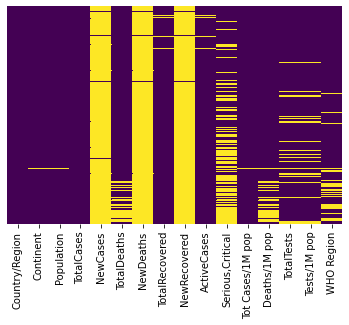

In [1194]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

Correlational Matrix 

In [1195]:
corrmatrix=data.corr()

In [1196]:
print(corrmatrix)

                  Population  TotalCases  NewCases  TotalDeaths  NewDeaths  \
Population          1.000000    0.546158  0.889610     0.431072   0.910836   
TotalCases          0.546158    1.000000  0.999459     0.938622   0.998062   
NewCases            0.889610    0.999459  1.000000     0.991894   0.995554   
TotalDeaths         0.431072    0.938622  0.991894     1.000000   0.999507   
NewDeaths           0.910836    0.998062  0.995554     0.999507   1.000000   
TotalRecovered      0.590239    0.985764  0.991416     0.935410   0.998935   
NewRecovered        0.854194    0.998258  0.999636     0.988362   0.992651   
ActiveCases         0.459124    0.969423  0.935500     0.927625   0.888717   
Serious,Critical    0.595379    0.967270  0.985526     0.906627   0.997112   
Tot Cases/1M pop   -0.009337    0.252627  0.321203     0.237206   0.046499   
Deaths/1M pop       0.025686    0.280476  0.842468     0.425186   0.751519   
TotalTests          0.497937    0.891001  0.214572     0.850304 

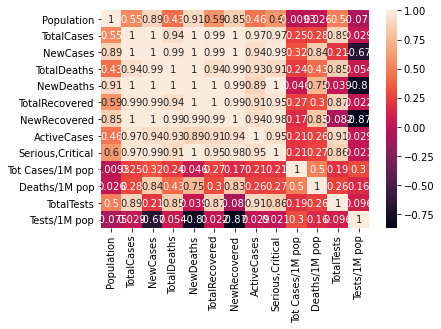

In [1197]:
sns.heatmap(corrmatrix,annot=True)

Continue to run the correlational matrix dropping correlated values until only relevant, non duplicate information is remaining

In [1198]:
data= data.drop(['NewCases', 'NewDeaths','NewRecovered','WHO Region'], axis=1)

Highly correlated fields, or fields with correlational values higher than 0.8 or lower than -0.8 should be removed in further analysis. New Cases, Total Cases, Total Deaths, New Deaths, Total Recovered, New Recovered, Active Cases, Total Tests, and Serious/Critical are all highly correlated with eachother. In order to ensure an accurate analysis, highly correlated fields will be removed and this analysis will focus only on Total Cases.

We are removing Tot Cases/1M pop, Deaths/1M pop, Tests/1M pop, and WHO Region because they are redundant.

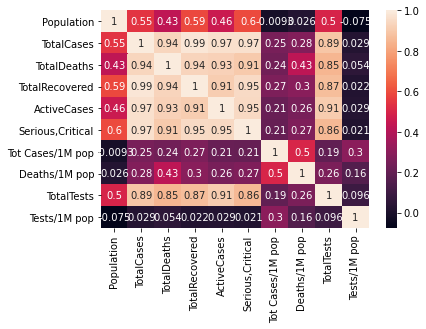

In [1199]:
corrmatrix=data.corr()
sns.heatmap(corrmatrix,annot=True)

Even though Population, Total Cases, Total Deaths and Total Recovered all have a correllational coefficient of close to 1 and therefore are highly correlated with eachother, I believe it is important to keep all four of these metrics because they all can provide insights on the dataset to help us understand the data. Other metrics that highly correlated with eachother were removed to avoid duplication of information with these four specific metrics.

In [1200]:
data.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0


In [1201]:
data.groupby('Continent')['TotalDeaths'].mean()

Continent
Africa                 402.072727
Asia                  2395.880952
Australia/Oceania       70.250000
Europe                4560.711111
North America         8209.107143
South America        11914.230769
Name: TotalDeaths, dtype: float64

In [1202]:
def impute_deaths(num):
    deaths = num[0]     
    continent = num[1]
    if pd.isnull(deaths):
        if continent == 'Africa':
            return 402.07
        if continent == 'Asia':
            return 2395.88
        if continent == 'Australia/Oceania':
            return 70.25
        if continent == 'Europe':
            return 4560.71
        if continent == 'North America':
            return 8209.11
        else:
            return 11914.23
    else:
        return deaths

In [1203]:
data['TotalDeaths'] = data[['TotalDeaths','Continent']].apply(impute_deaths, axis = 1) 

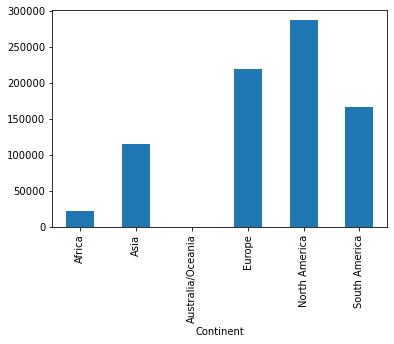

In [1204]:
data.groupby('Continent')['TotalDeaths'].sum().plot(kind='bar')

In [1205]:
data.groupby('Continent')['TotalRecovered'].mean()

Continent
Africa                12168.771930
Asia                  73086.875000
Australia/Oceania      2103.333333
Europe                36075.045455
North America         90047.942857
South America        222582.142857
Name: TotalRecovered, dtype: float64

In [1206]:
def impute_recovered(num):
    recovered = num[0]     
    continent = num[1]
    if pd.isnull(recovered):
        if continent == 'Africa':
            return 12168.77
        if continent == 'Asia':
            return 73086.88
        if continent == 'Australia/Oceania':
            return 2103.33
        if continent == 'Europe':
            return 36075.05
        if continent == 'North America':
            return 90047.94
        else:
            return 222582.14
    else:
        return recovered

In [1207]:
data['TotalRecovered'] = data[['TotalRecovered','Continent']].apply(impute_recovered, axis = 1) 

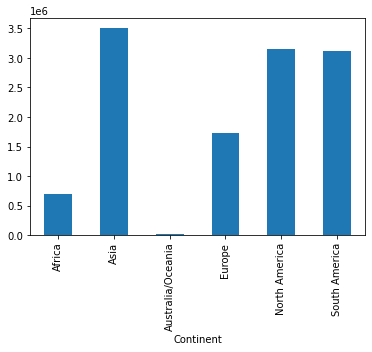

In [1208]:
data.groupby('Continent')['TotalRecovered'].sum().plot(kind='bar')

In [1209]:
data.groupby('Continent')['ActiveCases'].mean()

Continent
Africa                5195.315789
Asia                 22520.770833
Australia/Oceania     1472.333333
Europe               10801.386364
North America        72505.028571
South America        90874.142857
Name: ActiveCases, dtype: float64

In [1210]:
def impute_active(num):
    active = num[0]     
    continent = num[1]
    if pd.isnull(active):
        if continent == 'Africa':
            return 5195.32
        if continent == 'Asia':
            return 22520.77
        if continent == 'Australia/Oceania':
            return 1472.33
        if continent == 'Europe':
            return 10801.39
        if continent == 'North America':
            return 72505.03
        else:
            return 90874.14
    else:
        return active

In [1211]:
data['ActiveCases'] = data[['ActiveCases','Continent']].apply(impute_recovered, axis = 1) 

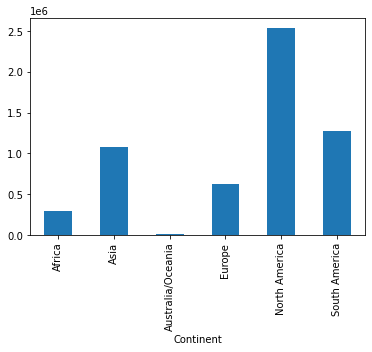

In [1212]:
data.groupby('Continent')['ActiveCases'].sum().plot(kind='bar')

In [1213]:
data.groupby('Continent')['Serious,Critical'].mean()

Continent
Africa                 42.392857
Asia                  669.607143
Australia/Oceania      52.000000
Europe                152.941176
North America        1512.294118
South America        1099.615385
Name: Serious,Critical, dtype: float64

In [1214]:
def impute_serious(num):
    serious = num[0]     
    continent = num[1]
    if pd.isnull(serious):
        if continent == 'Africa':
            return 42.39
        if continent == 'Asia':
            return 669.61
        if continent == 'Australia/Oceania':
            return 52.00
        if continent == 'Europe':
            return 152.94
        if continent == 'North America':
            return 1512.29
        else:
            return 1099.62
    else:
        return serious

In [1215]:
data['Serious,Critical'] = data[['Serious,Critical','Continent']].apply(impute_recovered, axis = 1) 

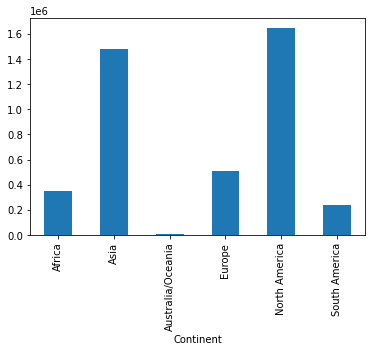

In [1216]:
data.groupby('Continent')['Serious,Critical'].sum().plot(kind='bar')

In [1217]:
data.groupby('Continent')['TotalTests'].mean()

Continent
Africa               1.971330e+05
Asia                 1.420735e+06
Australia/Oceania    8.588018e+05
Europe               2.045226e+06
North America        2.063929e+06
South America        1.598544e+06
Name: TotalTests, dtype: float64

In [1218]:
def impute_ttests(num):
    ttests = num[0]     
    continent = num[1]
    if pd.isnull(ttests):
        if continent == 'Africa':
            return 1.971330e+05
        if continent == 'Asia':
            return 1.420735e+06
        if continent == 'Australia/Oceania':
            return 8.588018e+05
        if continent == 'Europe':
            return 2.045226e+06
        if continent == 'North America':
            return 2.063929e+06
        else:
            return 1.598544e+06
    else:
        return ttests

In [1219]:
data['TotalTests'] = data[['TotalTests','Continent']].apply(impute_recovered, axis = 1) 

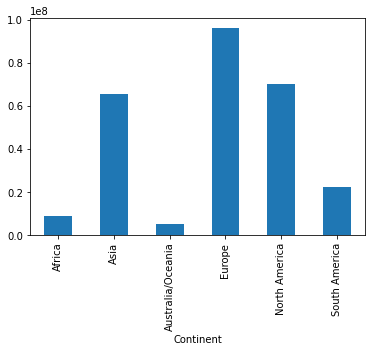

In [1220]:
data.groupby('Continent')['TotalTests'].sum().plot(kind='bar')

In [1221]:
data.groupby('Continent')['Deaths/1M pop'].mean()

Continent
Africa                18.241455
Asia                  43.971429
Australia/Oceania      3.825000
Europe               214.955556
North America        110.607143
South America        216.769231
Name: Deaths/1M pop, dtype: float64

In [1222]:
def impute_tdeathsM(num):
    tdeathsM = num[0]     
    continent = num[1]
    if pd.isnull(tdeathsM):
        if continent == 'Africa':
            return 18.24
        if continent == 'Asia':
            return 43.97
        if continent == 'Australia/Oceania':
            return 3.83
        if continent == 'Europe':
            return 214.96
        if continent == 'North America':
            return 110.61
        else:
            return 216.77
    else:
        return tdeathsM

In [1223]:
data['Deaths/1M pop'] = data[['Deaths/1M pop','Continent']].apply(impute_recovered, axis = 1) 

In [1224]:
data.groupby('Continent')['Tests/1M pop'].mean()

Continent
Africa                18319.136364
Asia                  74640.282609
Australia/Oceania     57847.166667
Europe               176300.851064
North America         60878.676471
South America         78117.571429
Name: Tests/1M pop, dtype: float64

In [1225]:
def impute_ttestsM(num):
    ttestsM = num[0]     
    continent = num[1]
    if pd.isnull(ttestsM):
        if continent == 'Africa':
            return 18319.14
        if continent == 'Asia':
            return 74640.28
        if continent == 'Australia/Oceania':
            return 57847.17
        if continent == 'Europe':
            return 176300.85
        if continent == 'North America':
            return 60878.68
        else:
            return 78117.57
    else:
        return ttestsM

In [1226]:
data['Tests/1M pop'] = data[['Tests/1M pop','Continent']].apply(impute_recovered, axis = 1) 

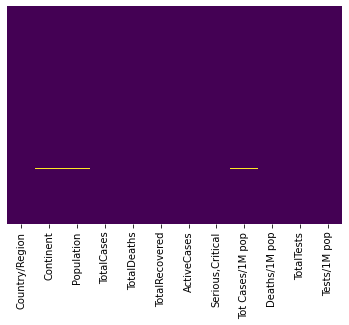

In [1227]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [1228]:
indexname = data[data['Country/Region'] == 'Diamond Princess'].index

In [1229]:
data.drop(indexname, inplace = True)

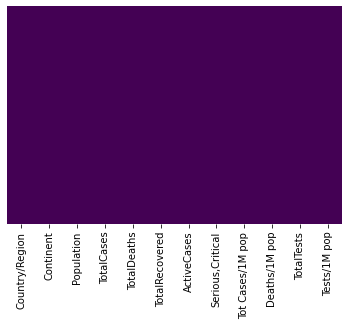

In [1230]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [1231]:
dum_continent = pd.get_dummies(data['Continent'], drop_first = True)

In [1232]:
dum_country = pd.get_dummies(data['Country/Region'], drop_first = True)

In [1233]:
dum_country.head()

,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,Ukraine,Uruguay,Uzbekistan,Vatican City,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1234]:
dum_continent.head()

,Asia,Australia/Oceania,Europe,North America,South America
0,0,0,0,1,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,0,0


In [1235]:
data = pd.concat([data,dum_country,dum_continent], axis = 1)

In [1236]:
data = data.drop(['Continent', 'Country/Region'], axis = 1)

In [1237]:
data.head()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,...,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe,Asia,Australia/Oceania,Europe,North America,South America
0,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,...,0,0,0,0,0,0,0,0,1,0
1,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,...,0,0,0,0,0,0,0,0,0,1
2,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,...,0,0,0,0,0,1,0,0,0,0
3,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,...,0,0,0,0,0,0,0,1,0,0
4,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,...,0,0,0,0,0,0,0,0,0,0


In [1238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 208
Columns: 222 entries, Population to South America
dtypes: float64(9), int64(1), uint8(212)
memory usage: 60.9 KB


In [1239]:
data.describe()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,...,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe,Asia,Australia/Oceania,Europe,North America,South America
count,2.080000e+02,2.080000e+02,208.000000,2.080000e+02,2.080000e+02,208.000000,208.000000,208.000000,2.080000e+02,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,3.041549e+07,9.215603e+04,3900.836779,5.872039e+04,2.795884e+04,20379.020865,3196.024038,6955.104471,1.289855e+06,79166.970000,...,0.004808,0.004808,0.004808,0.004808,0.004808,0.230769,0.028846,0.230769,0.168269,0.067308
std,1.047661e+08,4.335840e+05,14760.969426,2.548190e+05,1.733557e+05,33981.163727,5191.986457,25300.937171,5.333873e+06,147390.345433,...,0.069338,0.069338,0.069338,0.069338,0.069338,0.422342,0.167778,0.422342,0.375008,0.251159
min,8.010000e+02,1.000000e+01,1.000000,7.000000e+00,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.663140e+05,7.312500e+02,28.500000,3.385000e+02,8.950000e+01,22.250000,282.000000,7.000000,1.280825e+04,10454.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.041972e+06,4.544000e+03,156.500000,2.433500e+03,1.021000e+03,513.000000,1015.000000,36.000000,1.123535e+05,31269.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.575614e+07,3.733675e+04,1769.500000,2.622325e+04,8.655000e+03,36075.050000,3841.750000,175.750000,7.001068e+05,83456.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.381345e+09,5.032179e+06,162804.000000,2.576668e+06,2.292707e+06,222582.140000,39922.000000,222582.140000,6.313960e+07,995282.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Scale Data

In [1240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [1241]:
data_scaled

array([[ 2.8779185 , 11.4209507 , 10.79106123, ..., -0.54772256,
         2.22325373, -0.26863534],
       [ 1.74421881,  6.53211989,  6.43397686, ..., -0.54772256,
        -0.44979122,  3.72251835],
       [12.92582906,  4.46953122,  2.56271827, ..., -0.54772256,
        -0.44979122, -0.26863534],
       ...,
       [-0.29098505, -0.21302755,  0.54418688, ..., -0.54772256,
        -0.44979122,  3.72251835],
       [-0.29101077, -0.21302986,  0.04481177, ...,  1.82574186,
        -0.44979122, -0.26863534],
       [-0.28529018, -0.21303449, -0.26483663, ..., -0.54772256,
        -0.44979122, -0.26863534]])

In [1242]:
data_scaled =pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,...,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe,Asia,Australia/Oceania,Europe,North America,South America
0,2.877918,11.420951,10.791061,9.905157,13.095685,-0.061447,2.316439,-0.256065,11.623630,0.758136,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,2.223254,-0.268635
1,1.744219,6.532120,6.433977,7.824134,4.298055,-0.355789,2.031083,-0.257175,2.239476,-0.116176,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,-0.449791,3.722518
2,12.925829,4.469531,2.562718,5.187387,3.344704,-0.337322,-0.334014,-0.274370,3.920195,-0.429365,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.069505,1.825742,-0.172345,-0.547723,-0.449791,-0.268635
3,1.105359,1.802694,0.726984,2.429672,0.884547,-0.533314,0.536342,-0.271596,5.342391,0.846435,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,1.825742,-0.449791,-0.268635
4,0.277150,1.031182,0.387300,1.292637,0.655176,-0.585262,1.132732,-0.269140,0.349547,-0.177664,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,-0.449791,-0.268635


In [1243]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Columns: 222 entries, Population to South America
dtypes: float64(222)
memory usage: 360.9 KB


In [1244]:
data_scaled['TotalCases'].describe()

count    2.080000e+02
mean    -7.205774e-17
std      1.002413e+00
min     -2.130345e-01
25%     -2.113670e-01
50%     -2.025522e-01
75%     -1.267379e-01
max      1.142095e+01
Name: TotalCases, dtype: float64

# K Clustering for Descriptive Analytics

In [1245]:
from sklearn.cluster import KMeans

In [1246]:
X = data_scaled

In [1247]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state=42)

In [1248]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [1249]:
pred=kmeans.predict(X)

In [1250]:
from sklearn import metrics
metrics.silhouette_score(X, pred)

0.01263673316882202

This score is closer to 1 than 0, indicating strong clustering relationship

### Elbow Method

In [1251]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    pred=kmeans.predict(X)
    wcss.append(kmeans.inertia_)

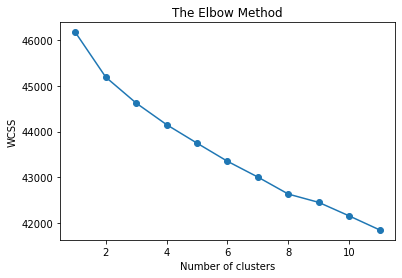

In [1252]:
plt.plot(range(1, 12), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method bends around 3 clusters, indicating that the data naturally seperates into three groups.

### Silhoutte scores

In [1253]:
s_score = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    pred=kmeans.predict(X)
    s_score.append(metrics.silhouette_score(X, pred))

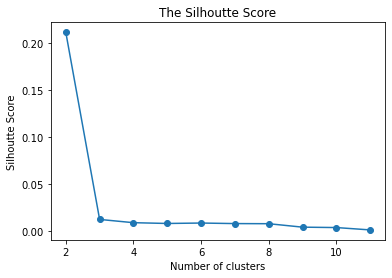

In [1254]:
plt.plot(range(2, 12), s_score,marker='o')
plt.title('The Silhoutte Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

According to the Silhouette score, the optimal number of clusters is two as this is where the Silhouette Score is optimized. Typically, the Silhouette Score confirms the elbow method, although this analysis differs slightly.

In [1255]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)
pred = kmeans.predict(X)

In [1256]:
pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1257]:
data_scaled.head()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,...,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe,Asia,Australia/Oceania,Europe,North America,South America
0,2.877918,11.420951,10.791061,9.905157,13.095685,-0.061447,2.316439,-0.256065,11.623630,0.758136,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,2.223254,-0.268635
1,1.744219,6.532120,6.433977,7.824134,4.298055,-0.355789,2.031083,-0.257175,2.239476,-0.116176,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,-0.449791,3.722518
2,12.925829,4.469531,2.562718,5.187387,3.344704,-0.337322,-0.334014,-0.274370,3.920195,-0.429365,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.069505,1.825742,-0.172345,-0.547723,-0.449791,-0.268635
3,1.105359,1.802694,0.726984,2.429672,0.884547,-0.533314,0.536342,-0.271596,5.342391,0.846435,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,1.825742,-0.449791,-0.268635
4,0.277150,1.031182,0.387300,1.292637,0.655176,-0.585262,1.132732,-0.269140,0.349547,-0.177664,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,-0.449791,-0.268635


In [1258]:
data_scaled['cluster'] = pred

In [1259]:
data_scaled.head()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,...,Western Sahara,Yemen,Zambia,Zimbabwe,Asia,Australia/Oceania,Europe,North America,South America,cluster
0,2.877918,11.420951,10.791061,9.905157,13.095685,-0.061447,2.316439,-0.256065,11.623630,0.758136,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,2.223254,-0.268635,1
1,1.744219,6.532120,6.433977,7.824134,4.298055,-0.355789,2.031083,-0.257175,2.239476,-0.116176,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,-0.449791,3.722518,1
2,12.925829,4.469531,2.562718,5.187387,3.344704,-0.337322,-0.334014,-0.274370,3.920195,-0.429365,...,-0.069505,-0.069505,-0.069505,-0.069505,1.825742,-0.172345,-0.547723,-0.449791,-0.268635,1
3,1.105359,1.802694,0.726984,2.429672,0.884547,-0.533314,0.536342,-0.271596,5.342391,0.846435,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,1.825742,-0.449791,-0.268635,1
4,0.277150,1.031182,0.387300,1.292637,0.655176,-0.585262,1.132732,-0.269140,0.349547,-0.177664,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,-0.449791,-0.268635,0


In [1260]:
data_scaled['cluster'].value_counts()

0    204
1      4
Name: cluster, dtype: int64

In [1261]:
a=data_scaled.TotalCases
b=data_scaled.Population
c=data_scaled.cluster

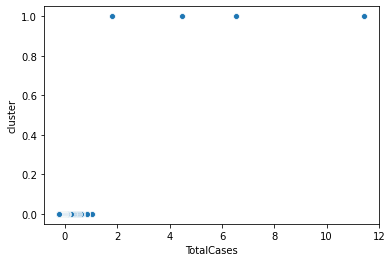

In [1262]:
sns.scatterplot(a,c, marker='o')

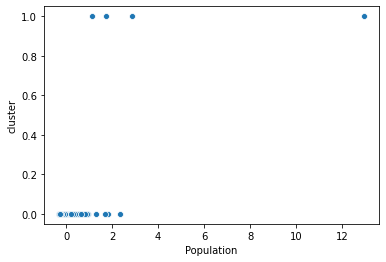

In [1263]:
sns.scatterplot(b,c,marker='o')

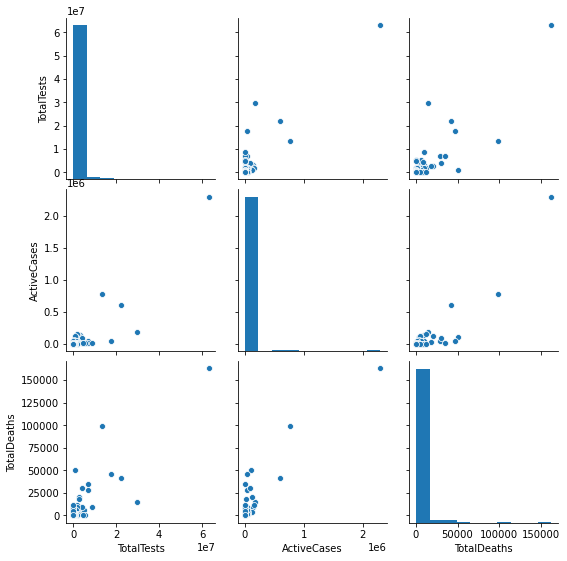

In [1264]:
sns.pairplot(data, vars = ['TotalTests','ActiveCases','TotalDeaths'])

Separating the data into 2 clusters per the Silhouette Score preference does not tell us much about our data. Only four countries fall into the second cluster. We believe we can get a more accurate visualization of the data with a higher number of clusters. Therefore, we will rerun the analysis with a cluster number of 3 per the Elbow method to test if data clusters of 3 is more helpful in understanding the data groups. 

In [1265]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(X)
pred = kmeans.predict(X)

In [1266]:
pred

array([2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [1267]:
data_scaled['cluster'] = pred

In [1268]:
data_scaled.head(10)

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,...,Western Sahara,Yemen,Zambia,Zimbabwe,Asia,Australia/Oceania,Europe,North America,South America,cluster
0,2.877918,11.420951,10.791061,9.905157,13.095685,-0.061447,2.316439,-0.256065,11.623630,0.758136,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,2.223254,-0.268635,2
1,1.744219,6.532120,6.433977,7.824134,4.298055,-0.355789,2.031083,-0.257175,2.239476,-0.116176,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,-0.449791,3.722518,2
2,12.925829,4.469531,2.562718,5.187387,3.344704,-0.337322,-0.334014,-0.274370,3.920195,-0.429365,...,-0.069505,-0.069505,-0.069505,-0.069505,1.825742,-0.172345,-0.547723,-0.449791,-0.268635,2
3,1.105359,1.802694,0.726984,2.429672,0.884547,-0.533314,0.536342,-0.271596,5.342391,0.846435,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,1.825742,-0.449791,-0.268635,1
4,0.277150,1.031182,0.387300,1.292637,0.655176,-0.585262,1.132732,-0.269140,0.349547,-0.177664,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,-0.449791,-0.268635,1
5,0.943900,0.856646,3.165688,0.983957,0.435797,-0.483549,0.075099,-0.260067,-0.043777,-0.482726,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,2.223254,-0.268635,0
6,0.024885,0.839813,1.122083,0.989815,0.559096,-0.559096,2.045949,-0.251034,0.226192,-0.024797,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,-0.449791,3.722518,1
7,-0.107957,0.634657,0.406654,1.107165,-0.065600,-0.561102,3.083117,-0.255075,0.088472,0.087428,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,-0.449791,3.722518,1
8,0.196345,0.613940,0.545869,0.525695,0.725444,-0.557120,0.738871,-0.266287,0.096218,-0.297839,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,-0.547723,-0.449791,3.722518,1
9,0.156354,0.606588,1.670521,-0.089083,0.046931,-0.582961,0.846797,-0.251390,1.085216,0.489133,...,-0.069505,-0.069505,-0.069505,-0.069505,-0.547723,-0.172345,1.825742,-0.449791,-0.268635,1


In [1269]:
data_scaled['cluster'].value_counts()

1    170
0     35
2      3
Name: cluster, dtype: int64

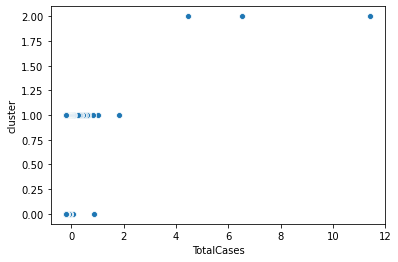

In [1270]:
sns.scatterplot(a,c, marker='o')

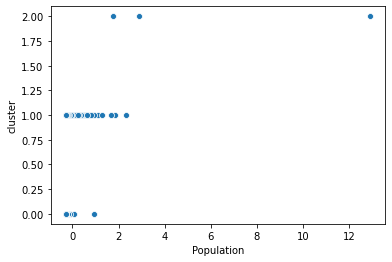

In [1271]:
sns.scatterplot(b,c,marker='o')

### Analysis of Clustering

Typically, the Silhouette Method and the Elbow Method agree with each other. In our analysis, however, our Elbow Method was slightly higher with a score of 3 as opposed to 2. For a conservative analysis, we ran our first tests with 2 clusters. The outputs of 2 clusters were very highly skewed, with only 1 of over 200 countries. Given this, we did not believe the silhouette cluster result of 2 was the most accurate. We then decided to run the analysis again with 3 clusters. The second analysis had a much better separation of data; the majority of data points were still in group 1 (170 of 208), but there is a more significant number of data points in group 2 (35 of 208) and 3 in group 3. By separating our data into 3 groups, we are able to get a better visual understanding of how our data points relate to each other and those that are most similar and tend to cluster together. We acknowledge that by running our analysis on 3 clusters per the Elbow method, we are not adhering to the cluster suggestion from the Silhouette Score yet we are continuing to move forward with the three clusters because we are able to pull more useful data and understanding

What our data indicates is that of 208 countries, the majority (170) behave similarly to each other as they fall into the same group, cluster 1. 16.8% of our data falls in cluster 0 and only 1.4% fall in to our cluster 2. There is a steep drop off of from cluster 1 to cluster 0 and 2 showing most of our data falls somewhere in the middle, with slight potential outliers on both the high and low end.



### Split Data into Training and Testing

In [1272]:
x = data.drop(['TotalCases'], axis = 1)

In [1273]:
x.columns

Index(['Population', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'Albania',
       ...
       'Vietnam', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'Asia',
       'Australia/Oceania', 'Europe', 'North America', 'South America'],
      dtype='object', length=221)

In [1274]:
y = data['TotalCases']

Scale features

In [1275]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [1276]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Random Forrest Regression Model

In [1277]:
from sklearn.ensemble import RandomForestRegressor

In [1278]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[10, 50, 100, 200, 300, 500, 800]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.301, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.786, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.893, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.615, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.958, total=   0.0s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.606, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] .................... n_estimators=50, score=-3.483, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.851, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.474, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.879, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.554, total=   0.4s
[CV] n_estimators=100 ................................................
[CV] ................... n_estimators=100, score=-1.000, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   23.2s finished


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 50, 100, 200, 300, 500, 800]},
             verbose=3)

In [1279]:
grid.best_params_

{'n_estimators': 10}

In [1280]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 101)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=101)

In [1281]:
predictions1 = grid.best_estimator_.predict(x_test)

In [1282]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

Mean Absolute Error: 25331.838095238094
Mean Squared Error: 9011247063.732378
Root Mean Squared Error: 94927.58852795312


### KNN Regression Model

In [1283]:
from sklearn.neighbors import KNeighborsRegressor

In [1284]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':list(range(1,50))}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] n_neighbors=1 ...................................................
[CV] ...................... n_neighbors=1, score=-0.049, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.694, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ...................... n_neighbors=1, score=-0.024, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.801, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ...................... n_neighbors=1, score=-0.001, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.104, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=5, score=0.298, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.622, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.210, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.774, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.415, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.260, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.538, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] .

[CV] ...................... n_neighbors=19, score=0.090, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] ...................... n_neighbors=19, score=0.521, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] ...................... n_neighbors=19, score=0.273, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] ...................... n_neighbors=19, score=0.113, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] ...................... n_neighbors=19, score=0.346, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ...................... n_neighbors=20, score=0.086, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ...................... n_neighbors=20, score=0.495, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] .

[CV] ...................... n_neighbors=34, score=0.408, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.156, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.048, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.307, total=   0.0s
[CV] n_neighbors=35 ..................................................
[CV] ...................... n_neighbors=35, score=0.027, total=   0.0s
[CV] n_neighbors=35 ..................................................
[CV] ...................... n_neighbors=35, score=0.396, total=   0.0s
[CV] n_neighbors=35 ..................................................
[CV] ...................... n_neighbors=35, score=0.149, total=   0.0s
[CV] n_neighbors=35 ..................................................
[CV] .

[CV] ...................... n_neighbors=46, score=0.214, total=   0.0s
[CV] n_neighbors=47 ..................................................
[CV] ...................... n_neighbors=47, score=0.003, total=   0.0s
[CV] n_neighbors=47 ..................................................
[CV] ...................... n_neighbors=47, score=0.303, total=   0.0s
[CV] n_neighbors=47 ..................................................
[CV] ...................... n_neighbors=47, score=0.103, total=   0.0s
[CV] n_neighbors=47 ..................................................
[CV] ...................... n_neighbors=47, score=0.022, total=   0.0s
[CV] n_neighbors=47 ..................................................
[CV] ...................... n_neighbors=47, score=0.208, total=   0.0s
[CV] n_neighbors=48 ..................................................
[CV] ...................... n_neighbors=48, score=0.001, total=   0.0s
[CV] n_neighbors=48 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    2.1s finished


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=3)

In [1285]:
grid.best_params_

{'n_neighbors': 4}

In [1286]:
grid_predictions = grid.best_estimator_.predict(x_test)

In [1287]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

Mean Absolute Error (MAE): 24447.0
Mean Squared Error (MSE): 1821658621.1845238
Root Mean Squared Error (RMSE): 42680.892928622336


# Linear Regression Model

In [1288]:
from sklearn.linear_model import LinearRegression

In [1289]:
lm = LinearRegression()

In [1290]:
lm.fit(x_train, y_train)

LinearRegression()

In [1291]:
print('Intercept: ',lm.intercept_)

Intercept:  96023.34939759035


In [1292]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Population,-2439.423493
TotalDeaths,135384.156051
TotalRecovered,-20933.542712
ActiveCases,87749.142888
"Serious,Critical",3069.291589
...,...
Asia,-16319.578715
Australia/Oceania,1166.458523
Europe,-4172.289877
North America,18121.912432


In [1293]:
predictions = lm.predict(x_test)

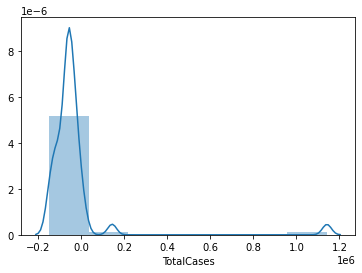

In [1294]:
sns.distplot((y_test-predictions),bins=7)

This distribution plot shows data tends towards normalcy

In [1295]:
from sklearn import metrics

In [1296]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error (MAE): 94380.54541238843
Mean Squared Error (MSE): 37312183591.34611
Root Mean Squared Error (RMSE): 193163.6187053507
